## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

C:\Users\cb1118\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df.converted.sum()/df.converted.count()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2=df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated('user_id')]

user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

c. What is the row information for the repeat **user_id**? 

In [12]:
df2.query("user_id == 773192")

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(2893, inplace=True)

C:\Users\cb1118\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
df2.query("user_id == 773192")

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
obs_mean = df2.converted.mean()
obs_mean

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
(df2.query("group == 'control'")['converted'] == 1).mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
(df2.query("group == 'treatment'")['converted'] == 1).mean()

0.11880806551510564

In [18]:
obs_diff = (df2.query("group == 'treatment'")['converted'] == 1).mean() - (df2.query("group == 'control'")['converted'] == 1).mean()
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [19]:
(df2.query("converted >= 0")['landing_page'] == 'new_page').mean()

0.50006194422266881

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer**

Given the information above, there is not enough evidence to indicate that the new treatment page will lead to more conversions.  50% of all users landing on the new page meaning that an equal number of conversion occurred on the old page.  Because the number of conversions on the new page was equal to or less than the old page, the null hypothesis is true in this case (given the information we have). 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Part II, Question 1 Answer

<br>

**Null Hypothesis**
<br>
**$p_{old}$** >= **$p_{new}$**
<br>
<br>
**Alternative Hypothesis**
<br>
**$p_{new}$** < **$p_{old}$**





`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
#since we are referring to the null in this argument, this is simply the conversion rate for the entire 
#data set since the null argument is that there is no difference in conversion rate.
treatment_cnv = df2.converted.mean()
treatment_cnv

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
#since we are referring to the null in this argument, this is simply the conversion rate for the entire 
#data set since the null argument is that there is no difference in conversion rate.
control_cnv = df2.converted.mean()
control_cnv

0.11959708724499628

c. What is $n_{new}$?

In [22]:
treatment_num = df2.query('group=="treatment"').shape[0]
treatment_num

145310

d. What is $n_{old}$?

In [23]:
control_num = df2.query('group=="control"').shape[0]
control_num

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(1, treatment_cnv, treatment_num)
new_page_converted.mean()

0.1193379671048104

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(1, control_cnv, control_num)
old_page_converted.mean()

0.11873425389264425

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

0.00060371321216615148

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs = []

for _ in range(10000):
    old_page_converted = np.random.binomial(1, control_cnv, control_num)
    new_page_converted = np.random.binomial(1, treatment_cnv, treatment_num)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

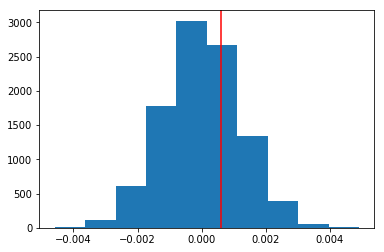

In [28]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.axvline(diff, color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
(p_diffs > obs_diff).mean()

0.90480000000000005

In [30]:
#calculated null_vals as well for comparison.  Found the output to be very similar to the previous plot.
p_diffs=np.array(p_diffs)
null_vals=np.random.normal(0, p_diffs.std(), p_diffs.size)

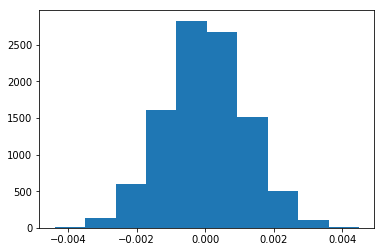

In [31]:
plt.hist(null_vals);

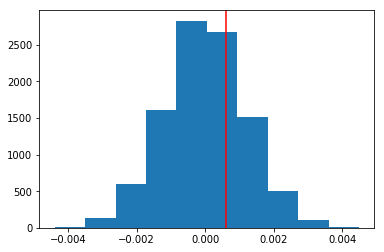

In [32]:
plt.hist(null_vals);
plt.axvline(x=diff, color='red');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>**Answer:** In question j, the p-Value was computed.  It represents the probability that you will find the observed results or more "extreme" results when analyzing the null hypothesis of the question.  P-Value is also known as calculated probability.  In our project, the p-Value is very high, suggesting that there is little evidence against the null hypothesis and indicates that we cannot reject the null hypothesis for this data set.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2.query('group=="control"').converted.sum()
convert_new = df2.query('group=="treatment"').converted.sum()
n_old = df2.query('group=="control"').shape[0]
n_new = df2.query('group=="treatment"').shape[0]
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old, n_new], alternative='smaller')
(z_score, p_value)

(1.3109241984234394, 0.90505831275902449)

In [35]:
from scipy.stats import norm

norm.cdf(z_score)

0.90505831275902449

In [36]:
norm.ppf(1-(.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>**Revised Answer:** Based on the results of the z-test, we cannot reject the null hypothesis.  The z-score is with the margin of error (-1.96 to 1.96) and the high p-value suggest strong evidence that we cannot reject the null hypothesis.  These results correspond to the earlier findings in questions j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>** Revised Answer:** The appropriate regression for this use case is Logistic Regression. "conversion or no conversion" implies that we are working with categorical output therefore the use of the Logistic model

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2['intercept']=1

C:\Users\cb1118\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
# A number of ways this can be done... lambda function, pd.get_dummies for example
df2['ab_page']=df2.group
df2.ab_page.replace(('treatment','control'), (1,0), inplace=True)

C:\Users\cb1118\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\cb1118\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [39]:
df2.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  ab_page  
0          1        0  
1          1        0  
2          1        1  
3          1        1  
4          1        0

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [40]:
# Fit linear model and generate the results
#lin = sm.OLS(df2['converted'], df2[['intercept','ab_page']])
#result = lin.fit()

In [41]:
# Fit linear model and generate the results
lin = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
result = lin.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Jun 2018   Pseudo R-squ.:               8.077e-06
Time:                        13:56:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


In [43]:
#exponentiate the coefficient of ab_page
np.exp(-0.0150)

0.98511193960306265

In [44]:
#calculate the recipricol
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

> **Answer:** The p-Value for ab_page is .190. The difference is accounted for by what each test uses as its null hypothesis.  In Part II, the null hypothesis test is P-old >= P-new.  Whereas, in the logistic regression the null hypothesis is focused on wether or not there is any change at all, i.e. P-old = P-new (alternative would be P-old <> P-new).  Like previous tests, we cannot reject the null hypothesis based on the results of the test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Answer:** Additional factors may be able to help create a more accurate model to analyze your results.  In our sample, factors such as geography, user age or education level might prove very helpful in analyzing results.  While more data can be helpful, it can also be a disadvantage for a number of reasons:  A linear relationship may not exist between factors, the existence of outliers, correlated errors and other problems could cause innaccuracy in the model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
#import country data and join to existing dataframe
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  
user_id                                 
834778           0          1        0  
928468           0          1        1  
822059           1          1        1  
711597           0          1        0  
710616           0          1        1

In [46]:
df_new.groupby('country').count()

timestamp   group  landing_page  converted  intercept  ab_page
country                                                                
CA           14499   14499         14499      14499      14499    14499
UK           72466   72466         72466      72466      72466    72466
US          203619  203619        203619     203619     203619   203619

In [47]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]= pd.get_dummies(df_new['country'])
#df_new['country_uk']=df_new['country'].apply(lambda x: 1if x =='UK' else 0)
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  CA  UK  US  
user_id                                             
834778           0          1        0   0   1   0  
928468           0          1        1   0   0   1  
822059           1          1        1   0   1   0  
711597           0          1        0   0   1   0  
710616           0          1        1   0   1   0

In [48]:
# calculate means by country and group for comparison
df_new.groupby(['country','group']).converted.mean()

country  group    
CA       control      0.118783
         treatment    0.111902
UK       control      0.120022
         treatment    0.121171
US       control      0.120630
         treatment    0.118466
Name: converted, dtype: float64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
### Fit Your Linear Model And Obtain the Results
df_new['US_x_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_x_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new.head()



country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  CA  UK  US  US_x_ab_page  UK_x_ab_page  
user_id                                                                         
834778           0          1        0   0   1   0             0             0  
928468           0          1        1   0   0   1             1             0  
822059           1          1        1   0   1   0             0             1  
711597           0          1        0   0   1   0             0             0  
710616           0          1        1   0   1   0             0             1

In [50]:
logit = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','US','UK','US_x_ab_page','UK_x_ab_page']])
result2 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [51]:
print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 26 Jun 2018   Pseudo R-squ.:               3.482e-05
Time:                        13:56:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page         -0.0674      0.052     -1.297      0.195      -0.169       0.034
US               0.0175      0.038      0.46

In [52]:
#exponentiate the coefficient of the variables
np.exp(-0.0674), np.exp(0.0175), np.exp(0.0118), np.exp(0.0469), np.exp(0.0783)

(0.93482119806188357,
 1.0176540221507617,
 1.011869894648401,
 1.0480172021191829,
 1.0814470441230692)

>**Conclusions:** Not unlike the previous logistic regression, this analysis indicates that we cannot reject the null hypothesis.  The p-values indicate there is a relationship between the variables which tells us null hypothesis cannot be rejected.  The exponentiated coefficients of the new columns indicate that there is a 4.8% higher chance of a US based User converting vs a Canadian user (assuming all else remains fixed).  UK users are 8.1% more likely to convert under the same scenario.  

>In summary, all of the tests performed indicate that we cannot reject the null hypothesis and it would be better to continue to use the old page.

>Note: Due to the deadline I was given to have Term 1 completed by midnight on June 26, I ran out of time to do another MLR which I felt would be interesting.   Generating day of week information and then generating dummy variables would be a interesting analysis to see if regular human behavioral patterns during the week play a role in the conversion process.

Chris Bartsch<br>
Analyze A/B Test Results<br>
Udacity Data Analyst Nano Degree Program<br>
June 25, 2018

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.